**Name:** Yutika Rege

**PRN:** 1901202012

**DS303:** Machine Learning 1

**Task:** Perform EDA on California Housing Data and gain insights.

**Importing the requires libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

**Reading the dataset:**

In [2]:
df = pd.read_csv("housing.csv")

**Performing EDA:**

* **Column names:**

In [3]:
col_names = pd.DataFrame(df.columns, columns=["Column names"])
col_names

,Column names
0,longitude
1,latitude
2,housing_median_age
3,total_rooms
4,total_bedrooms
5,population
6,households
7,median_income
8,median_house_value
9,ocean_proximity


* **Information about the dataset (to gain insights about the data types and null values):**

In [4]:
print("Basic info:\n")
df.info()

Basic info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
print(f"The only variable missing values in the 'total_bedrooms' variable with {df.total_bedrooms.isna().sum()} NaN values.")

The only variable missing values in the 'total_bedrooms' variable with 207 NaN values.


In [6]:
df=df[['longitude','latitude','housing_median_age', 
       'total_rooms','population','households', 
       'median_income','median_house_value','ocean_proximity']]
print("Dropped the 'total_bedrooms' variable successfully.")

Dropped the 'total_bedrooms' variable successfully.


* **Viewing the head of the df**

In [7]:
df.head(3).transpose()

,0,1,2
longitude,-122.23,-122.22,-122.24
latitude,37.88,37.86,37.85
housing_median_age,41,21,52
total_rooms,880,7099,1467
population,322,2401,496
households,126,1138,177
median_income,8.3252,8.3014,7.2574
median_house_value,452600,358500,352100
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY


* **Shape:**

In [8]:
print(f"Shape of the entire dataset:\n\nNo. of rows: {df.shape[0]}\nNo. of cols: {df.shape[1]}")

Shape of the entire dataset:

No. of rows: 20640
No. of cols: 9


* **Summary statistics:**

In [9]:
print("Summary statistics:\n")
df.describe().transpose()

Summary statistics:



,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


* **Basic analysis:**

**Q1. Find the number of number of houses as per their proximity to the ocean and use the appropriate visualisation.**

In [10]:
tmp = df.groupby(["ocean_proximity"]).count()
gbh = pd.DataFrame(tmp["households"])
gbh

,households
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
ISLAND,5
NEAR BAY,2290
NEAR OCEAN,2658


Text(0.5, 1.0, 'Number of households as per their proximity to the Ocean')

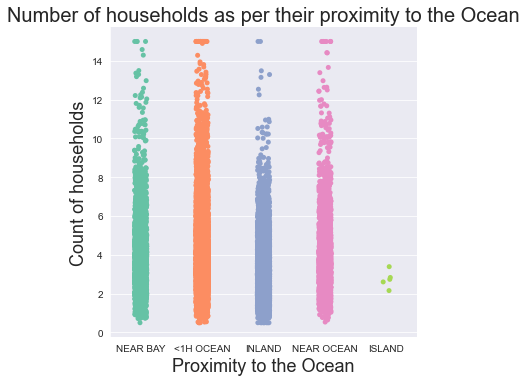

In [11]:
sns.catplot(data=df,x="ocean_proximity",y="median_income",palette="Set2")
plt.xlabel("Proximity to the Ocean",fontsize=18)
plt.ylabel("Count of households",fontsize=18)
plt.title("Number of households as per their proximity to the Ocean",fontsize=20)

**Q2. Find the relation between the value of the house and proximity to the ocean.**

In [12]:
tmp1 = df.groupby(["ocean_proximity"]).median()
gbmv = pd.DataFrame(tmp1["median_house_value"])
gbmv

,median_house_value
ocean_proximity,
<1H OCEAN,214850.0
INLAND,108500.0
ISLAND,414700.0
NEAR BAY,233800.0
NEAR OCEAN,229450.0


Text(0.5, 1.0, 'Median House Value as per proximity to the Ocean')

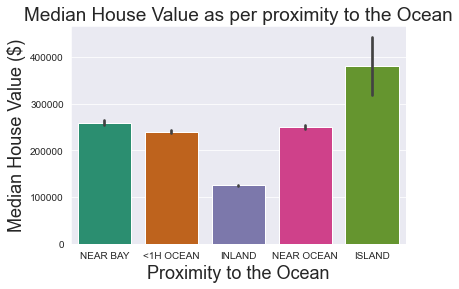

In [13]:
sns.barplot(data=df,x="ocean_proximity",y="median_house_value",palette="Dark2")
plt.xlabel("Proximity to the Ocean",fontsize=18)
plt.ylabel("Median House Value ($)",fontsize=18)
plt.title("Median House Value as per proximity to the Ocean",fontsize=19)

**Q3. Plot the appropriate graph for finding the correlation between median house value and median income (if any).**

Text(0.5, 1.0, 'Median house value v/s median income')

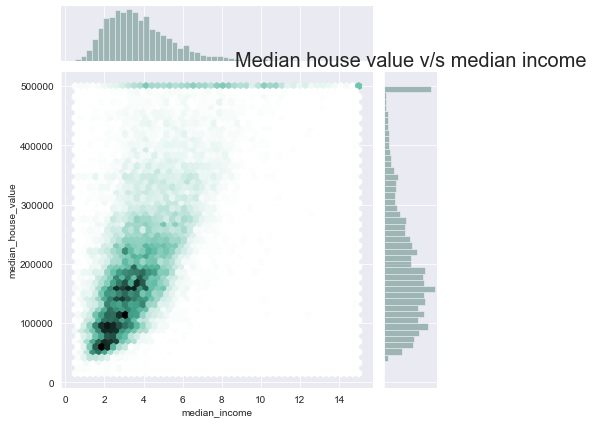

In [14]:
sns.jointplot(data=df,x="median_income",y="median_house_value",kind="hex",color="#2b6657")
plt.title("Median house value v/s median income",fontsize=20)

**Comments:**

> Maximum households are less than 1 hour away (distance-wise) from the ocean whereas only 5 houses are properly on the island. It is evident in the second graph (the comparative barplots) that the island has the most expensive houses which explains why it is inhabited by very few people. The cheapest houses are situated in the inland regions with average population meaning, neither too densely populated nor too scarcely populated. There is also a strong positive correlation between the household values and the income per household which explains the exclusivity of habitation on the island.

* **Geospatial analysis:**

**Q4. Plot the coordinates to produce the map of the state of California.**

Text(0.5, 1.0, 'Non-physical map of California (coordinates)')

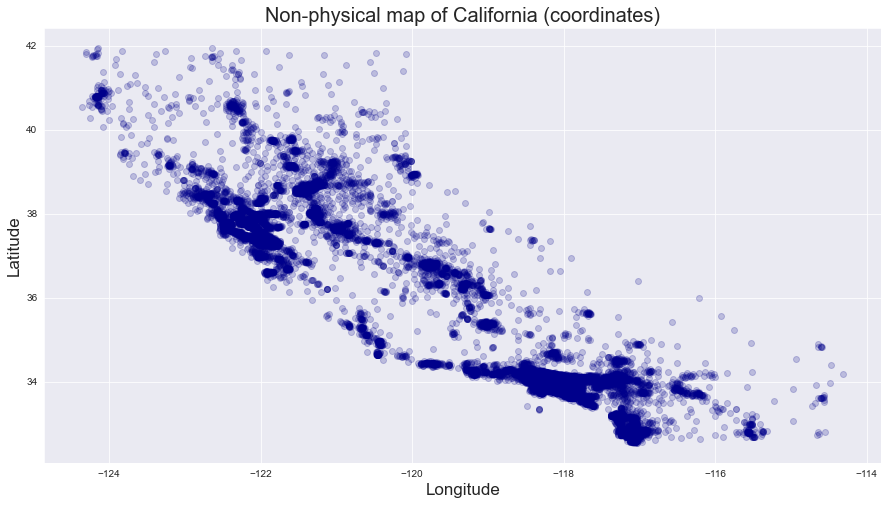

In [15]:
plt.figure(figsize=(15,8))
plt.scatter(df["longitude"],df["latitude"],c="darkblue",alpha=0.2)
plt.xlabel("Longitude",fontsize=17)
plt.ylabel("Latitude",fontsize=17)
plt.title("Non-physical map of California (coordinates)",fontsize=20)

**Q5. Try out different combinations of variables to plot the coordinates of the physical map of Calfornia.**

**i) Households' proximity to the ocean:**

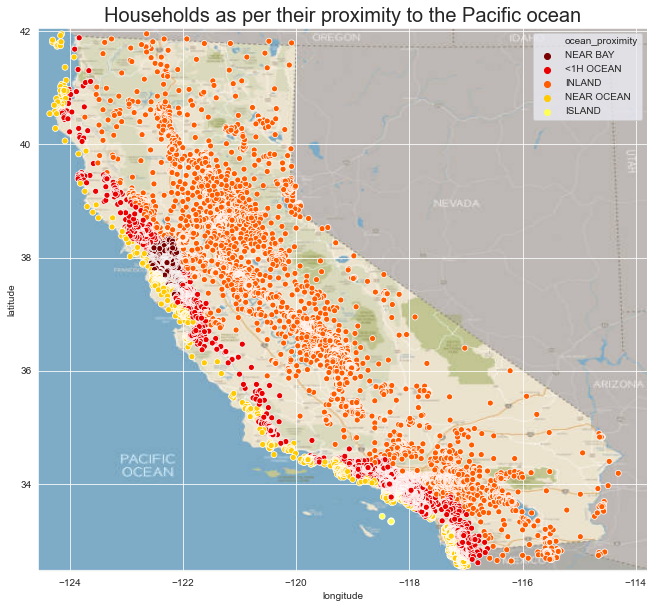

In [16]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="longitude",y="latitude",data=df,hue="ocean_proximity",palette="hot")
plt.title("Households as per their proximity to the Pacific ocean",fontsize=20)
cali_map = mpimg.imread("Housing_Cali_image.jpg")
plt.imshow(cali_map,extent=[-124.55,-113.80,32.45,42.05]);

**ii) Median age of the houses :**

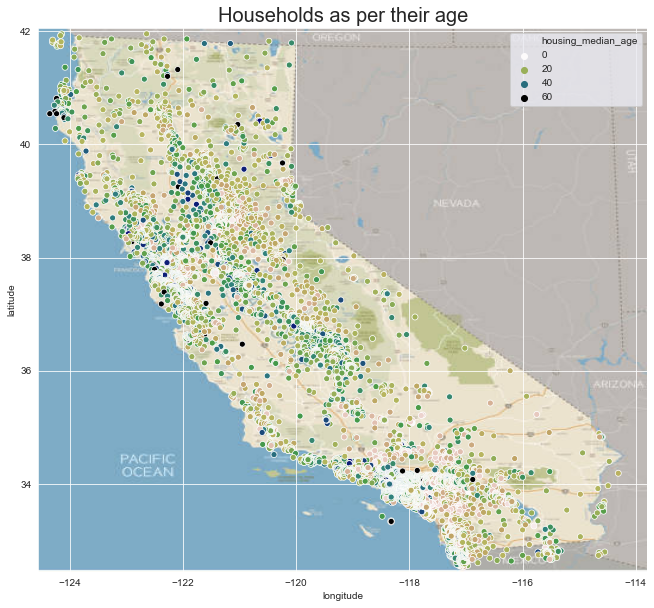

In [17]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="longitude",y="latitude",data=df,hue="housing_median_age",palette="gist_earth_r")
plt.title("Households as per their age",fontsize=20)
cali_map = mpimg.imread("Housing_Cali_image.jpg")
plt.imshow(cali_map,extent=[-124.55,-113.80,32.45,42.05]);

**iii) Median income and proximity to the ocean.**

In [18]:
import copy
inc_df = copy.deepcopy(df)

In [19]:
bins = (0.0,0.5,3.5,15.0)
group_names = ["low","medium","high"]
inc_df['median_income'] = pd.cut(inc_df['median_income'], bins = bins, labels = group_names)

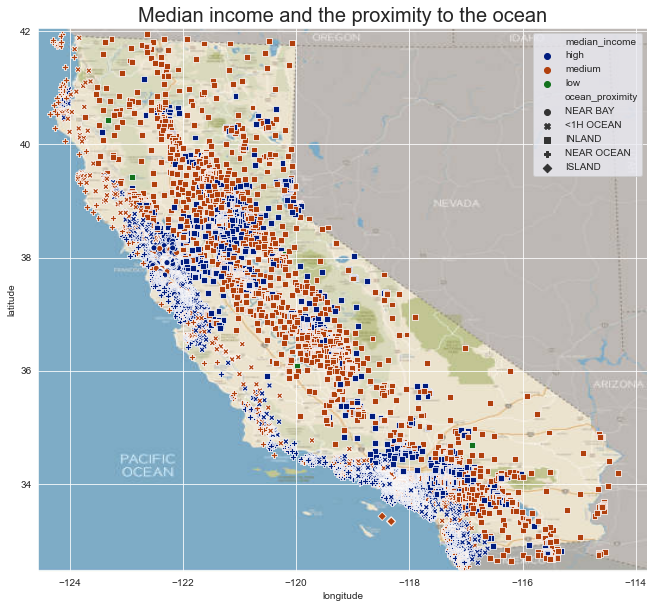

In [20]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="longitude",y="latitude",data=inc_df,style="ocean_proximity",
                hue="median_income",palette="dark",s=35)
plt.title("Median income and the proximity to the ocean",fontsize=20)
cali_map = mpimg.imread("Housing_Cali_image.jpg")
plt.imshow(cali_map,extent=[-124.55,-113.80,32.45,42.05]);

**Comments:**

> The very first map of California only has the coordinates without a proper structure, giving it a vagues, ambiguous look. Therefore, it was necessary that we support it with an outline of the Californian map in the form of an image. Several conclusions could be drawn from these geospatial graphs. 

1. As we deduced before, very less number of households are based on the island. These island houses are widely spread out, spanning across the entire coastline whereas maximum habitation is in the inlands (densely populated). The smallest cluster (area-wise) is the Bay area since it is not so spread out.

2. Most of the houses are between 20-40 years old and very few are 60 or over. There are almost no houses which are less than 20 years old.

3. The income range of the densely populated inland area is mostly medium to high. The state of California has maximum medium income households. But, the highest earning households are either near the ocean, one hour away from the ocean or on the island.